                            MOVIE PREDICTION 

Import all Files

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



Load the Database "Movies" with encoding

In [20]:

movies = pd.read_csv('Movies.csv', encoding='latin1')


Handling missing values of our dataset

In [21]:
movies['Rating'] = pd.to_numeric(movies['Rating'], errors='coerce')
movies['Votes'] = pd.to_numeric(movies['Votes'], errors='coerce')

movies['Rating'].fillna(movies['Rating'].mean(), inplace=True)
movies['Votes'].fillna(movies['Votes'].mean(), inplace=True)
movies['Genre'].fillna('Unknown', inplace=True)
movies['Director'].fillna('Unknown', inplace=True)
movies['Actor 1'].fillna('Unknown', inplace=True)
movies['Actor 2'].fillna('Unknown', inplace=True)
movies['Actor 3'].fillna('Unknown', inplace=True)

Encode the categorical Variables 

In [22]:
label_encoder = LabelEncoder()
movies['Genre'] = label_encoder.fit_transform(movies['Genre'])
movies['Director'] = label_encoder.fit_transform(movies['Director'])
movies['Actor 1'] = label_encoder.fit_transform(movies['Actor 1'])
movies['Actor 2'] = label_encoder.fit_transform(movies['Actor 2'])
movies['Actor 3'] = label_encoder.fit_transform(movies['Actor 3'])

Feature Selection

In [23]:
features = movies[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
target = movies['Rating']

Now, we will split the database

In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

We will now do Feature Scaling 

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Visualize the correlation matrix

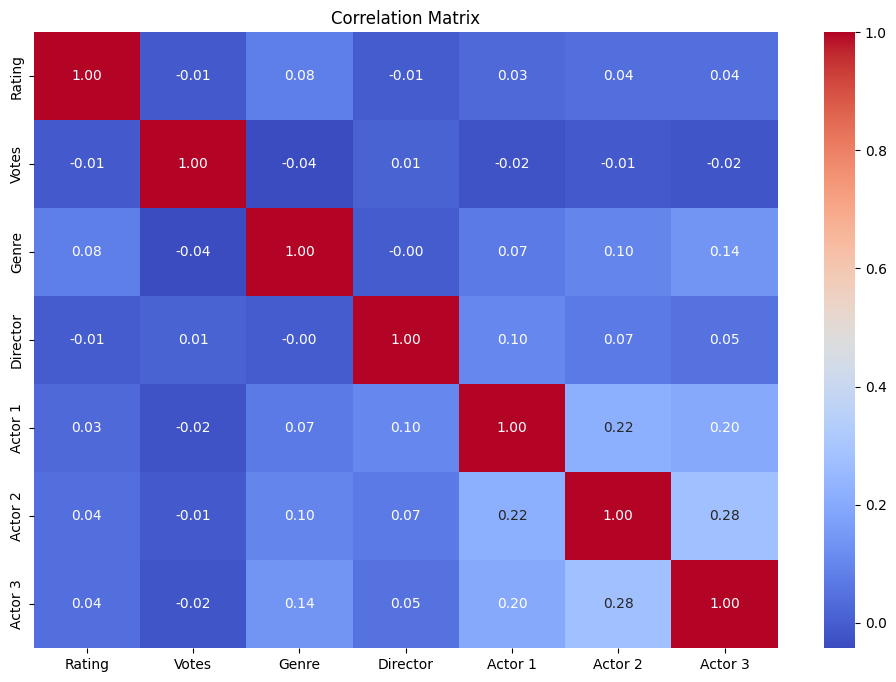

In [30]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = movies[['Rating', 'Votes', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Now we will build the regression Model

In [26]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Predicting the Model

In [27]:
y_pred = model.predict(X_test_scaled)

Evaluating our Model 

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.9555635781139004
R-squared: 0.007183332850645319


The predictions are

In [29]:
print(y_pred[:10])

[5.94059903 5.89957879 6.02173412 5.92553051 5.99500348 5.82224198
 5.71678659 5.67405703 5.88079625 5.96958652]


Visualize Actual vs Predicted Ratings 

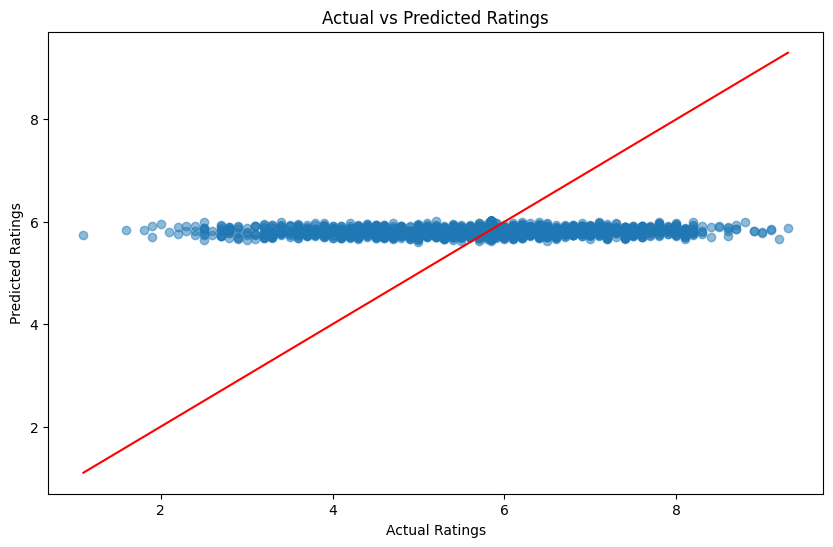

In [31]:
# Actual vs Predicted Ratings
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()


Visualize feature importance

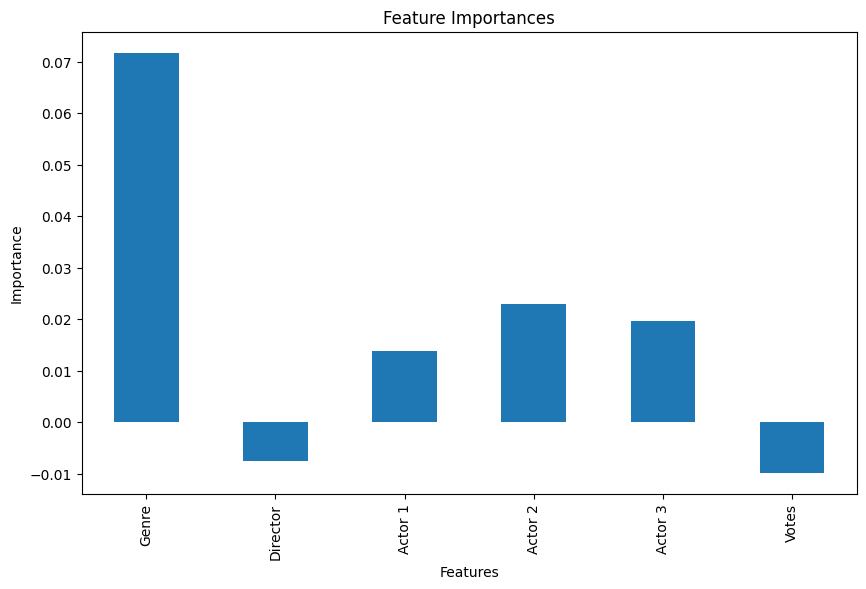

In [32]:
feature_importances = pd.Series(model.coef_, index=features.columns)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()